### Comparing different number of clusters with silhouette analysis and elbow method on KMeans clustering

#### Some display settings

In [1]:
from IPython.display import display, HTML

display(HTML("""<style>
.jp-OutputArea-output {
    max-height: 10000px;  /* Ajusta la altura máxima */
    max-width: 100%;    /* Ajusta el ancho máximo */
    overflow: visible;  /* Evita scroll */
}
</style>
"""))

#### Initialization and data creation

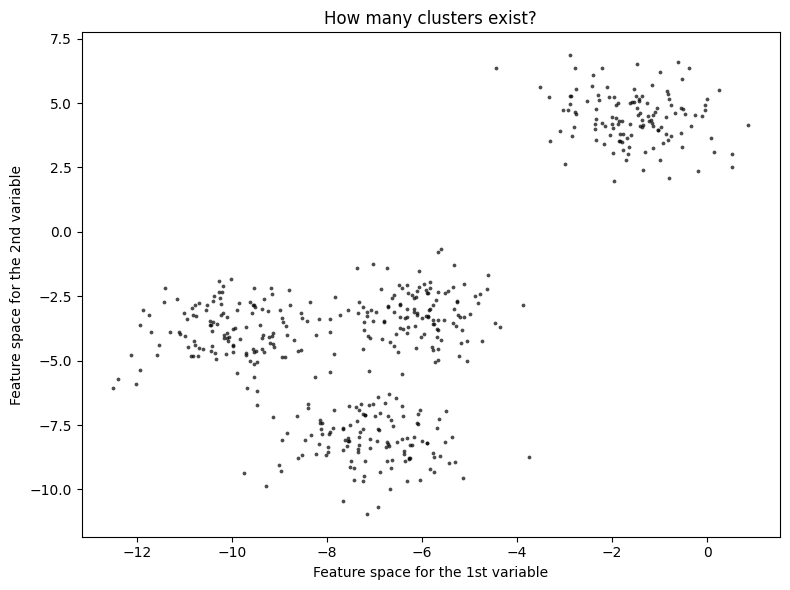

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

plt.rcParams["figure.figsize"] = (8, 6)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

plt.figure()
plt.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c="black", edgecolor="k"
)

plt.title("How many clusters exist?")
plt.xlabel("Feature space for the 1st variable")
plt.ylabel("Feature space for the 2nd variable")
plt.tight_layout()
plt.show()

#### Main function

It will iterate through different k values, calculate silhouette and generate a chart with the solution

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 2 clusters, the average silhouette_score is : 0.705


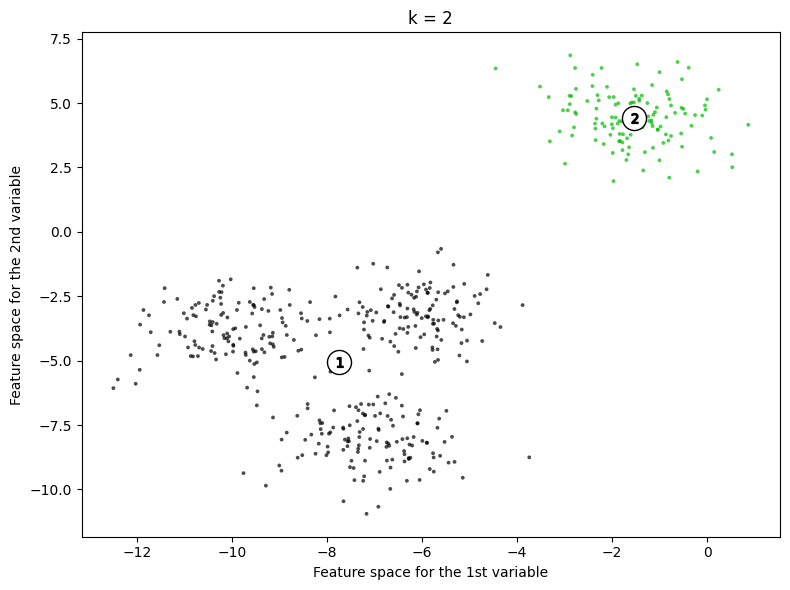

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 3 clusters, the average silhouette_score is : 0.588


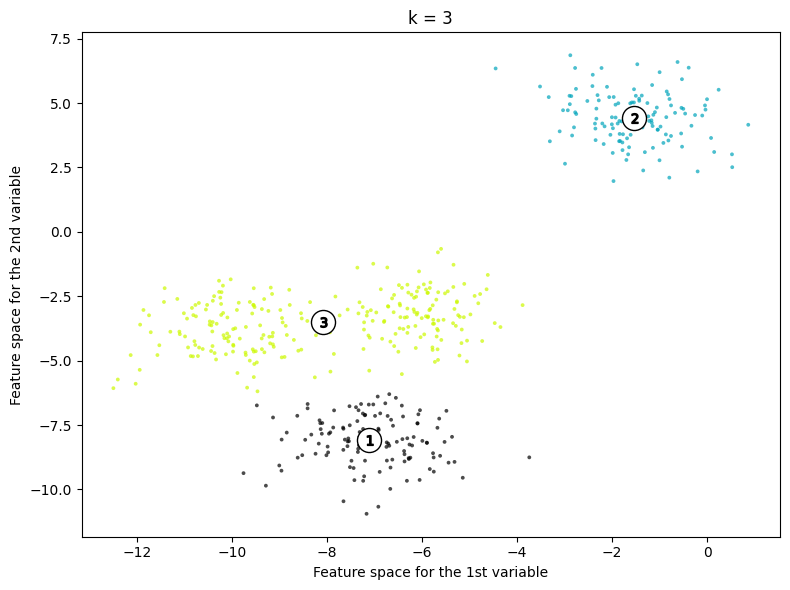

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 4 clusters, the average silhouette_score is : 0.651


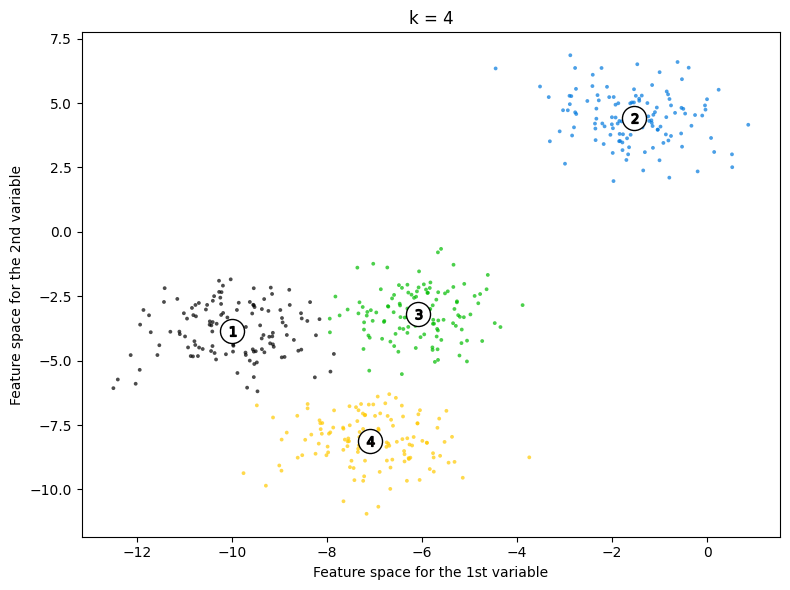

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 5 clusters, the average silhouette_score is : 0.580


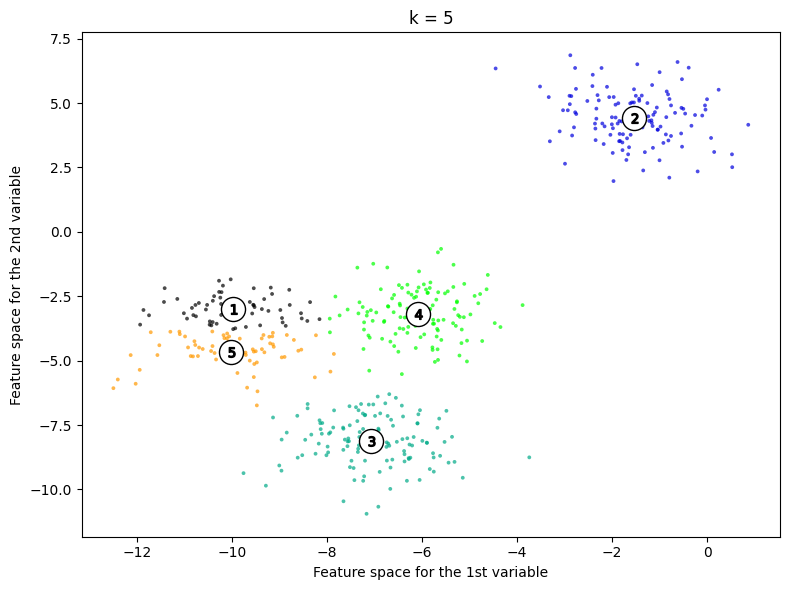

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 6 clusters, the average silhouette_score is : 0.497


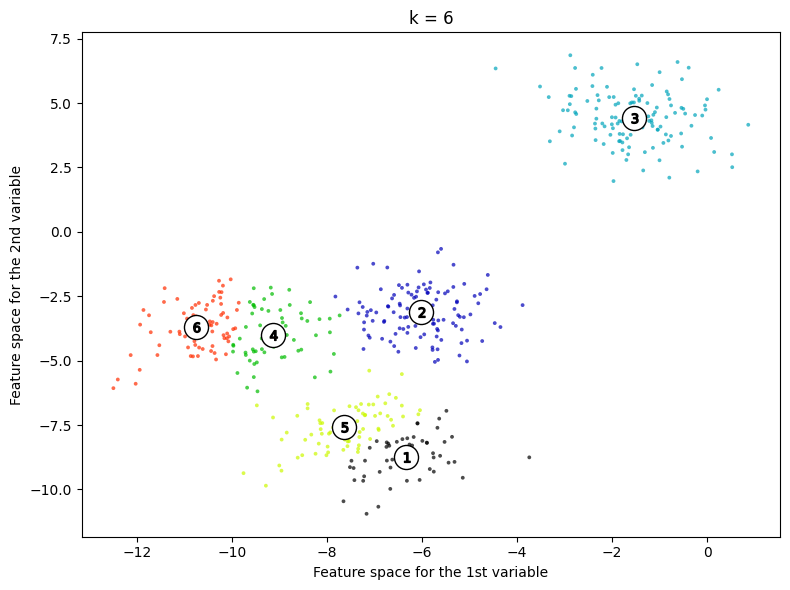

C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For = 7 clusters, the average silhouette_score is : 0.380


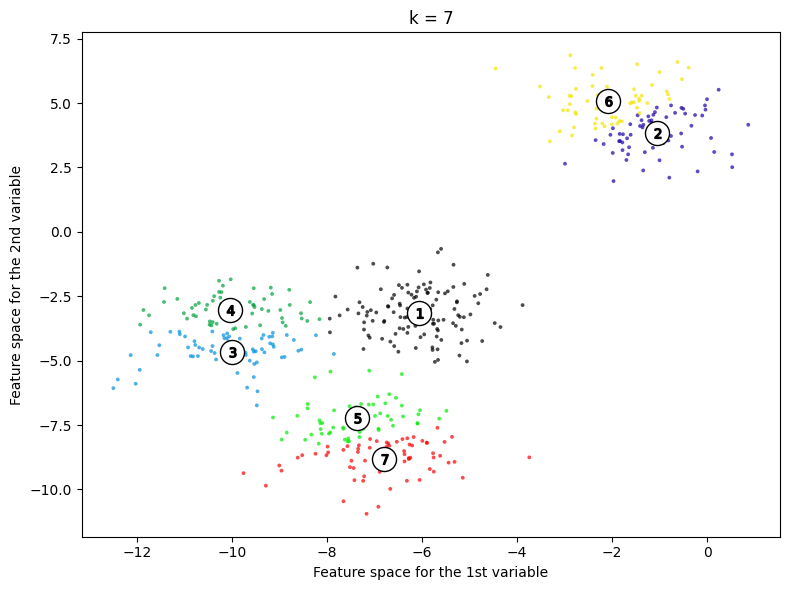

In [3]:
k = [2, 3, 4, 5, 6, 7]
inertia = []
silhouettes = []

for n_clusters in k:
    # Initialize the cluster with n_clusters value and a random generator seed of 10 for reproducibility.
    cluster = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = cluster.fit_predict(X)
    inertia.append(cluster.inertia_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouettes.append("{:.3f}".format(silhouette_avg))
    print(
        "For =", n_clusters, "clusters, the average silhouette_score is : {:.3f}".format(silhouette_avg)
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    plt.figure()
    plt.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    # Labeling the clusters
    centers = cluster.cluster_centers_
    # Draw white circles at cluster centers
    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=300,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        plt.scatter(c[0], c[1], marker="$%d$" % (i+1), alpha=1, s=50, edgecolor="k")
    
    plt.title(f"k = {n_clusters}")
    plt.xlabel("Feature space for the 1st variable")
    plt.ylabel("Feature space for the 2nd variable")
    plt.tight_layout()
    plt.show()

#### Elbow method

Finally, an elbow chart to help us on the decision

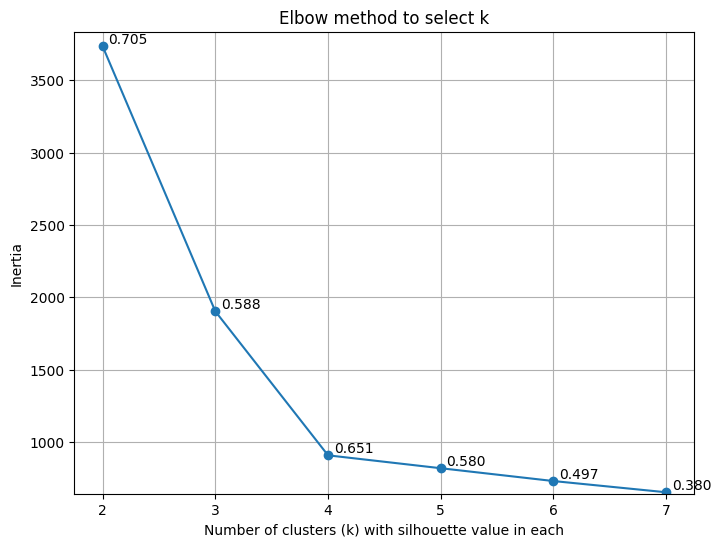

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(k, inertia, marker='o')

for i, txt in enumerate(silhouettes):
    plt.text(k[i]+0.05, inertia[i], f"{txt}", fontsize=10, ha='left', va='bottom')

plt.title("Elbow method to select k")
plt.xlabel("Number of clusters (k) with silhouette value in each")
plt.ylabel("Inertia")
plt.ylim(min(inertia) - 10, max(inertia) + 100)
plt.xticks(k)
plt.grid(True)
plt.show()